# Adventure Works 2025 Sales Analysis
In this analysis we examine the Adventure Works database to answer business intelligence questions like:
* Product categories and their metrics.
* Trends in sales over time.
* Regional depth metrics.

We will use SQL for the database connection and Python for the visualizations.

In [19]:
import pandas as pd 
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, text
from urllib.parse import quote_plus

user = "SA"
password = quote_plus("AStIyChGLQQn0K")
server = 'localhost:1433'
database = 'AdventureWorks2025'
driver = quote_plus("ODBC Driver 18 for SQL server")


connection_string = (
    f"mssql+pyodbc://{user}:{password}@{server}/{database}"
    f"?driver={driver}&Encrypt=yes&TrustServerCertificate=yes"
)

engine = create_engine(connection_string)


try:
    with engine.connect():
        print("Connection to SQL Server was successful")
except Exception as e:
    print("Could not connect", e)

Connection to SQL Server was successful


C:\Users\pappa\AppData\Local\Temp\ipykernel_2580\3001932253.py:22: SAWarning: Unrecognized server version info '17.0.1000.7'.  Some SQL Server features may not function properly.
  with engine.connect():


In [20]:
def query_df(sql:str):
    with engine.connect() as conn:
        return pd.read_sql(text(sql), conn)

## Visualization 1: Products Per Category
How many products is there in each category?

Tables used:
* Production.ProductCategory
* Production.ProductSubCategory
* Production.Product

Execution:
* JOIN Tables
* Count DISTINCT products per category
* Create Vertical chart
* Analyze result

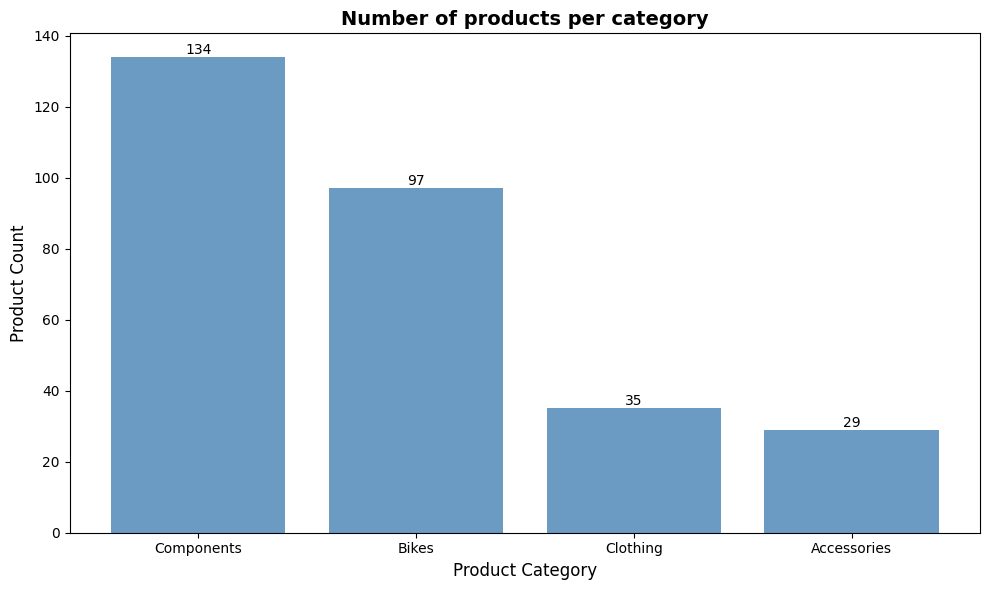

In [28]:
query_vis_1 = """
SELECT
    pc.Name AS CategoryName,
    COUNT(DISTINCT p.ProductID) AS ProductCount
FROM Production.ProductCategory pc
INNER JOIN Production.ProductSubcategory psc ON pc.ProductCategoryID  = psc.ProductCategoryID
INNER JOIN Production.Product p ON psc.ProductSubcategoryID = p.ProductSubcategoryID
GROUP BY pc.Name
ORDER BY ProductCount DESC
"""

df_vis_1 = query_df(query_vis_1)

fig, ax = plt.subplots(figsize = (10,6))
bars = ax.bar(df_vis_1['CategoryName'], df_vis_1['ProductCount'], color = 'steelblue', alpha = 0.8)

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{int(height)}",
        ha = 'center',
        va = 'bottom'
    )


ax.set_xlabel('Product Category', fontsize = 12)
ax.set_ylabel('Product Count', fontsize = 12)
ax.set_title('Number of products per category', fontsize = 14, fontweight = 'bold')
plt.tight_layout()
plt.show()

### Insights - Products Per Catoegory
* Components is the largest category with 134 products.
* Accessories is the smallest category with 29 products.

This indicates that the company is highly focused on components and spare parts. And that accessories could be a area of development.